In [1]:
from comet_ml import Experiment

experiment = Experiment(project_name="igti-projeto-aplicado", workspace="piantino")

/home/piantino/miniconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/piantino/igti-projeto-aplicado/55bb829d74bf4bbc982f66ab6ac660ea



In [2]:
import pandas as pd

colunas = ['ROTULO_MANUAL', 'EMENTA_NORM']

df = pd.read_csv('../data/ementas_pre-processadas.csv', header=0, sep=',', quotechar='"', usecols=colunas)

In [3]:
rotulos = ['EXP', 'BAN', 'OIG', 'DAN', 'SEG', 'CON', 'OIE']

In [4]:
df.loc[~df['ROTULO_MANUAL'].isin(rotulos)] = 'NONE'

groupby_rotulo = df.groupby('ROTULO_MANUAL')
groupby_rotulo.count()

,EMENTA_NORM
ROTULO_MANUAL,
BAN,971
CON,832
DAN,888
EXP,1784
NONE,3191
OIE,735
OIG,752
SEG,761


In [5]:
x = df['EMENTA_NORM'].values.astype('U')
y = df['ROTULO_MANUAL'].values

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

import collections

print(collections.Counter(y_train))
print(collections.Counter(y_test))

Counter({'NONE': 2416, 'EXP': 1313, 'BAN': 730, 'DAN': 674, 'CON': 621, 'OIG': 572, 'SEG': 563, 'OIE': 546})
Counter({'NONE': 775, 'EXP': 471, 'BAN': 241, 'DAN': 214, 'CON': 211, 'SEG': 198, 'OIE': 189, 'OIG': 180})


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression

vect = CountVectorizer()
tfidf = TfidfTransformer()
clf = LogisticRegression(solver='lbfgs', multi_class='auto')

text_clf = Pipeline([
    ('vect', vect),
    ('tfidf', tfidf),
    ('dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True, validate=True)),
    ('clf', clf)
])


text_clf.fit(x_train, y_train)

sklearn.linear_model.logistic:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                     func=<function <lambda> at 0x7fa6fed69158>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, pass_y='deprecated',
                                     validate=True)),
                ('clf',
                 LogisticRegres

In [8]:
# Predict Class
y_pred = text_clf.predict(x_test)

In [9]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         BAN       0.83      0.80      0.81       241
         CON       0.70      0.74      0.72       211
         DAN       0.77      0.80      0.79       214
         EXP       0.93      0.96      0.94       471
        NONE       1.00      1.00      1.00       775
         OIE       0.88      0.84      0.86       189
         OIG       0.91      0.83      0.87       180
         SEG       0.87      0.84      0.85       198

    accuracy                           0.90      2479
   macro avg       0.86      0.85      0.86      2479
weighted avg       0.90      0.90      0.90      2479



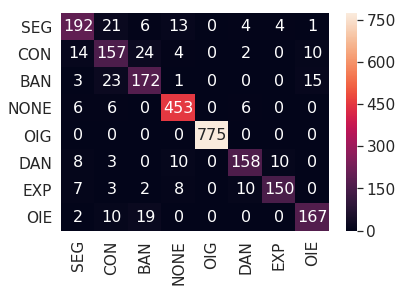

In [11]:
from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)

labels = set(y_test)

df_cm = pd.DataFrame(cnf_matrix, range(len(labels)), range(len(labels)))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, xticklabels=labels, yticklabels=labels, annot=True, fmt='g', annot_kws={"size": 16})

In [13]:
from sklearn import metrics

metrics_dict = {}

result = metrics.classification_report(y_test, y_pred, output_dict=True)

for label in result.keys():
    if type(result[label]) == float:
        metrics_dict[label] = result[label]
    else:
        for metric in result[label].keys():
            metrics_dict[label + '-' + metric] = str(result[label][metric])

experiment.log_metrics(metrics_dict)

In [14]:
experiment.end()

COMET INFO: ----------------------------
COMET INFO: Comet.ml Experiment Summary:
COMET INFO:   Data:
COMET INFO:     url: https://www.comet.ml/piantino/igti-projeto-aplicado/55bb829d74bf4bbc982f66ab6ac660ea
COMET INFO:   Metrics:
COMET INFO:               BAN-f1-score: 0.8118393234672304
COMET INFO:              BAN-precision: 0.8275862068965517
COMET INFO:                 BAN-recall: 0.7966804979253111
COMET INFO:                BAN-support: 241
COMET INFO:               CON-f1-score: 0.7235023041474655
COMET INFO:              CON-precision: 0.7040358744394619
COMET INFO:                 CON-recall: 0.7440758293838863
COMET INFO:                CON-support: 211
COMET INFO:               DAN-f1-score: 0.7871853546910756
COMET INFO:              DAN-precision: 0.7713004484304933
COMET INFO:                 DAN-recall: 0.8037383177570093
COMET INFO:                DAN-support: 214
COMET INFO:               EXP-f1-score: 0.94375
COMET INFO:              EXP-precision: 0.9263803680981595